In [1]:
import tensorflow as tf
from tensorflow import keras
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

os.environ['TF_CPP_MIN_LOG_LEVEL']='2'

In [2]:
fashion_mnist_data = keras.datasets.fashion_mnist
(all_x_train, all_y_train), (x_test, y_test) = fashion_mnist_data.load_data()

all_x_train = all_x_train.astype('float32') 
x_test = x_test.astype('float32')

In [4]:
print(f"all_x_train.shape = {all_x_train.shape}")
print(f"all_x_train[0].shape = {all_x_train[0].shape}")
print(f"all_x_train[0].dtype = {all_x_train[0].dtype}")

print(f"x_test.shape = {x_test.shape}")


all_x_train.shape = (60000, 28, 28)
all_x_train[0].shape = (28, 28)
all_x_train[0].dtype = float32
x_test.shape = (10000,)


In [4]:
x_validation, x_train = all_x_train[:5000] / 255.0, all_x_train[5000:] / 255.0
y_validation, y_train = all_y_train[:5000], all_y_train[5000:]

In [5]:
print(f"x_train.shape = {x_train.shape}")
print(f"x_train[0].shape = {x_train[0].shape}")
print(f"x_train[0].dtype = {x_train[0].dtype}")

x_train.shape = (55000, 28, 28)
x_train[0].shape = (28, 28)
x_train[0].dtype = float32


In [6]:
fashion_mnist_class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat", "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

In [7]:
for cls in range(5):
    print(cls, ":",fashion_mnist_class_names[y_train[cls]]) 

0 : Coat
1 : T-shirt/top
2 : Sneaker
3 : Ankle boot
4 : Ankle boot


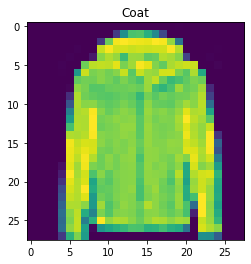

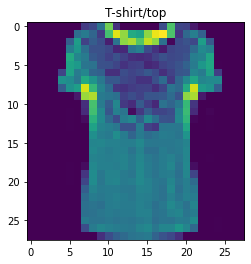

In [8]:
for i in range(2):
    my_img= x_train[i]
    my_img_class = y_train[i]
    my_img_class_name = fashion_mnist_class_names[my_img_class] 
    plt.imshow(my_img)
    plt.title(my_img_class_name)
    plt.show() 

In [9]:
model1 = keras.models.Sequential()
model1.add(keras.layers.Flatten(input_shape=[28, 28]))
model1.add(keras.layers.Dense(300, activation="relu"))
model1.add(keras.layers.Dense(150, activation="relu"))
model1.add(keras.layers.Dense(10, activation="softmax"))


 

In [10]:
model1.summary() 

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 300)               235500    
_________________________________________________________________
dense_1 (Dense)              (None, 150)               45150     
_________________________________________________________________
dense_2 (Dense)              (None, 10)                1510      
Total params: 282,160
Trainable params: 282,160
Non-trainable params: 0
_________________________________________________________________


In [11]:
hidden_ = model1.get_layer('dense_1')
weights, biases = hidden_.get_weights()
print("Les poids :\n ")
print(weights) 
print(weights.shape)
print("\nLes biais :\n ")
print(biases)
print(biases.shape)

Les poids :
 
[[ 0.0660976   0.05660684 -0.07136895 ...  0.0424329  -0.09606344
  -0.05489517]
 [ 0.08349757  0.11541742  0.0792702  ...  0.05178729  0.00928503
  -0.03378094]
 [ 0.00138865 -0.0233416  -0.00802676 ... -0.10342614 -0.00844335
  -0.02871398]
 ...
 [-0.08509746  0.05107844  0.06101492 ... -0.11332393 -0.100563
  -0.0649552 ]
 [-0.02766114 -0.10531881  0.09312865 ... -0.02262264  0.11483601
   0.10447685]
 [-0.10813703 -0.00813232  0.01048039 ...  0.00991713  0.04582493
  -0.07162592]]
(300, 150)

Les biais :
 
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0.]
(150,)


In [12]:
model2 = keras.models.Sequential()
model2.add(keras.layers.Flatten(input_shape=[28, 28]))
model2.add(keras.layers.Dense(300, activation="relu"))

my_weights_initializer = tf.keras.initializers.RandomNormal(mean=100., stddev=1.)
my_bias_initializer= tf.keras.initializers.Ones()  
model2.add(keras.layers.Dense(150, activation="relu" ,\
                                  kernel_initializer = my_weights_initializer, \
                                  bias_initializer = my_bias_initializer))
model2.add(keras.layers.Dense(10, activation="softmax"))

model2.summary()
 

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_1 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 300)               235500    
_________________________________________________________________
dense_4 (Dense)              (None, 150)               45150     
_________________________________________________________________
dense_5 (Dense)              (None, 10)                1510      
Total params: 282,160
Trainable params: 282,160
Non-trainable params: 0
_________________________________________________________________


In [13]:
hidden_ = model2.get_layer('dense_4')
weights, biases = hidden_.get_weights()
print("Les poids :\n ")
print(weights) 
print(weights.shape)
print("\nLes biais :\n ")
print(biases)
print(biases.shape)

Les poids :
 
[[101.781296  99.22688  101.06561  ... 100.05606   99.85397  100.30503 ]
 [101.71722   98.91859   99.06323  ... 101.620674  97.878395 101.26123 ]
 [ 98.25745   98.168045  99.38385  ... 100.782646  99.40467  100.490974]
 ...
 [101.12513  100.24388   99.547424 ... 101.528244  99.6419   100.93199 ]
 [100.34876  101.85785   99.90284  ...  99.7295   100.85832  101.88643 ]
 [ 99.76423   98.82184   98.95094  ... 100.01098  100.09875   98.182724]]
(300, 150)

Les biais :
 
[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1.]
(150,)


In [14]:
model1.compile(loss="sparse_categorical_crossentropy", optimizer="sgd", metrics=["accuracy"])

In [15]:
results = model1.fit(x_train, y_train, epochs=40,\
                    validation_data=(x_validation, y_validation))

Train on 55000 samples, validate on 5000 samples
Epoch 1/40
55000/55000 [==============================] - 4s 66us/sample - loss: 0.7186 - accuracy: 0.7665 - val_loss: 0.4936 - val_accuracy: 0.8354
Epoch 2/40
55000/55000 [==============================] - 3s 64us/sample - loss: 0.4873 - accuracy: 0.8302 - val_loss: 0.4528 - val_accuracy: 0.8490
Epoch 3/40
55000/55000 [==============================] - 4s 65us/sample - loss: 0.4425 - accuracy: 0.8452 - val_loss: 0.4283 - val_accuracy: 0.8490
Epoch 4/40
55000/55000 [==============================] - 3s 52us/sample - loss: 0.4142 - accuracy: 0.8551 - val_loss: 0.4000 - val_accuracy: 0.8602
Epoch 5/40
55000/55000 [==============================] - 3s 62us/sample - loss: 0.3945 - accuracy: 0.8606 - val_loss: 0.3931 - val_accuracy: 0.8620
Epoch 6/40
55000/55000 [==============================] - 3s 55us/sample - loss: 0.3780 - accuracy: 0.8660 - val_loss: 0.3705 - val_accuracy: 0.8660
Epoch 7/40
55000/55000 [==============================] -

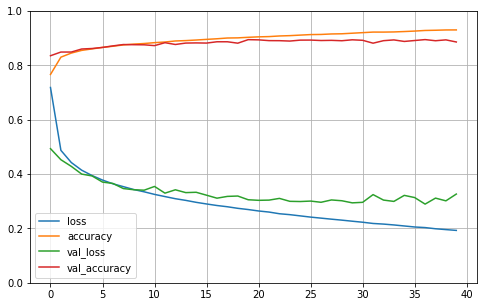

In [16]:
import pandas as pd
pd.DataFrame(results.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)  
plt.show()

In [17]:
x_test= x_test/255.0
print("Evaluation du modèle :")
model1.evaluate(x_test, y_test)

Evaluation du modèle :
10000/10000 [==============================] - 0s 30us/sample - loss: 0.3590 - accuracy: 0.8811


[0.3590307104289532, 0.8811]

In [22]:
x_new = x_test[0:7]
y_prob = model1.predict(x_new)
print(f"y_prob :\n{y_prob.round(2)}")
y_prediction = model1.predict_classes(x_new)
print(f"\ny_prediction :\n {y_prediction}")



y_prob :
[[0.   0.   0.   0.   0.   0.   0.   0.01 0.   0.99]
 [0.   0.   1.   0.   0.   0.   0.   0.   0.   0.  ]
 [0.   1.   0.   0.   0.   0.   0.   0.   0.   0.  ]
 [0.   1.   0.   0.   0.   0.   0.   0.   0.   0.  ]
 [0.45 0.   0.01 0.   0.   0.   0.53 0.   0.   0.  ]
 [0.   1.   0.   0.   0.   0.   0.   0.   0.   0.  ]
 [0.   0.   0.   0.   0.98 0.   0.01 0.   0.   0.  ]]

y_prediction :
 [9 2 1 1 6 1 4]


In [19]:
print(f"       Prédictions : {np.array(fashion_mnist_class_names)[y_prediction]}")
y_truth = y_test[0:7]
print(f"Les vraies classes : {np.array(fashion_mnist_class_names)[y_truth]}")

       Prédictions : ['Ankle boot' 'Pullover' 'Trouser' 'Trouser' 'Shirt' 'Trouser' 'Coat']
Les vraies classes : ['Ankle boot' 'Pullover' 'Trouser' 'Trouser' 'Shirt' 'Trouser' 'Coat']
